In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
# Reading from United Nations total prison populations
# Counts/Rate per 100,000 per populations
# 
# https://dataunodc.un.org/crime/total-prison-population

happiness_df = pd.read_csv("../Data/2017.csv", encoding="latin-1")
prison_df = pd.read_csv("../Data/un_prison_data.csv", encoding="latin-1")

# Combine the data into a single dataset
raw_df = pd.merge(prison_df, happiness_df)

In [3]:
raw_df.columns

Index(['Region', 'Sub region', 'Country', 'Source', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', 'Unnamed: 18', '2003.0', '2004.0', '2005.0', '2006.0',
       '2007.0', '2008.0', '2009.0', '2010.0', '2011.0', '2012.0', '2013.0',
       '2014.0', '2015.0', '2016.0', 'Happiness.Rank', 'Happiness.Score',
       'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [4]:
# Clean up data frame
raw_df.drop(['Region', 'Sub region','Source', '2003', '2004','2005', '2006', 
           'Unnamed: 18', '2003.0', '2004.0', '2005.0', '2006.0','Happiness.Rank',
           'Whisker.high', 'Whisker.low','Economy..GDP.per.Capita.', 'Family', 
           'Health..Life.Expectancy.','Generosity', 'Dystopia.Residual'], axis=1, inplace=True)
raw_df.head()

,Country,2007,2008,2009,2010,2011,2012,2013,2014,2015,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,Happiness.Score,Freedom,Trust..Government.Corruption.
0,Afghanistan,10590.0,12500.0,NaN,18283.0,NaN,24613.0,NaN,26519.0,NaN,...,63.5,NaN,80.2,NaN,81.0,NaN,NaN,3.794,0.106180,0.061158
1,Albania,2790.0,4916.0,4667.0,4657.0,4659.0,4618.0,4998.0,5689.0,5981.0,...,158.4,159.2,158.1,171.2,194.8,204.6,206.0,4.644,0.381499,0.039864
2,Algeria,55119.0,55598.0,NaN,49000.0,50000.0,50100.0,60220.0,61000.0,62150.0,...,135.7,135.8,133.4,157.1,156.0,155.9,NaN,5.872,0.233336,0.146096
3,Angola,NaN,NaN,16183.0,NaN,19898.0,NaN,21634.0,22826.0,24165.0,...,NaN,82.2,NaN,83.2,84.8,86.7,NaN,3.795,0.000000,0.069720
4,Argentina,52457.0,54537.0,57403.0,59227.0,60789.0,62263.0,64288.0,69060.0,72693.0,...,143.7,145.9,147.9,151.1,160.7,167.4,174.0,6.599,0.494519,0.059740


In [5]:
# Clean up dataframe - Happiness
happy_data = raw_df.iloc[:, [0, 21, 22,23]]
happy_data.columns = ["Country", "Happiness.Score", "Freedom","Trust..Government.Corruption"]
happy_df = pd.DataFrame(happy_data).reset_index()
happy_df.head()

,index,Country,Happiness.Score,Freedom,Trust..Government.Corruption
0,0,Afghanistan,3.794,0.106180,0.061158
1,1,Albania,4.644,0.381499,0.039864
2,2,Algeria,5.872,0.233336,0.146096
3,3,Angola,3.795,0.000000,0.069720
4,4,Argentina,6.599,0.494519,0.059740


In [6]:
# Collect the mean happiness, Freedome and trust for the world
average_happy_score = round(happy_df[('Happiness.Score')].mean(),5)
print(average_happy_score)
average_freedom = round(happy_df[('Freedom')].mean(),5)
print(average_freedom)

average_trust = round(happy_df[('Trust..Government.Corruption')].mean(),5)
print(average_trust)


5.38292
0.41588
0.12644


In [21]:
# Clean up dataframe - Prison Count
prison_count = raw_df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]
prison_count.columns = ["Country", 
                        "2007 Prison Count", "2008 Prison Count","2009 Prison Count","2010 Prison Count","2011 Prison Count", 
                        "2012 Prison Count","2013 Prison Count","2014 Prison Count", "2015 Prison Count","2016 Prison Count"]
prison_count_df = pd.DataFrame(prison_count)
prison_count_df = prison_count.set_index("Country")
prison_count_df.head(200)


,2007 Prison Count,2008 Prison Count,2009 Prison Count,2010 Prison Count,2011 Prison Count,2012 Prison Count,2013 Prison Count,2014 Prison Count,2015 Prison Count,2016 Prison Count
Country,,,,,,,,,,
Afghanistan,10590.0,12500.0,NaN,18283.0,NaN,24613.0,NaN,26519.0,NaN,NaN
Albania,2790.0,4916.0,4667.0,4657.0,4659.0,4618.0,4998.0,5689.0,5981.0,6031.0
Algeria,55119.0,55598.0,NaN,49000.0,50000.0,50100.0,60220.0,61000.0,62150.0,NaN
Angola,NaN,NaN,16183.0,NaN,19898.0,NaN,21634.0,22826.0,24165.0,NaN
Argentina,52457.0,54537.0,57403.0,59227.0,60789.0,62263.0,64288.0,69060.0,72693.0,76261.0
Armenia,3539.0,3965.0,4313.0,5142.0,4532.0,4756.0,3923.0,3880.0,3873.0,3833.0
Australia,27224.0,27615.0,29317.0,29700.0,29106.0,29381.0,30773.0,33789.0,36134.0,38845.0
Austria,9012.0,8248.0,8708.0,8813.0,8954.0,8805.0,8862.0,8692.0,NaN,8619.0
Azerbaijan,19559.0,20986.0,20651.0,21971.0,20546.0,20782.0,20669.0,22526.0,NaN,23311.0


In [8]:
# Calculate the average Prison count for each country from 2007-2016
prison_count_average= round(prison_count_df.mean(axis=1),1)
prison_count_df['Prison Count Average']= prison_count_average
prison_count_df = pd.DataFrame(prison_count_df).reset_index()

prison_count_df.head()
#prison_count_average.min()

#prison_count_average.max()


,Country,2007 Prison Count,2008 Prison Count,2009 Prison Count,2010 Prison Count,2011 Prison Count,2012 Prison Count,2013 Prison Count,2014 Prison Count,2015 Prison Count,2016 Prison Count,Prison Count Average
0,Afghanistan,10590.0,12500.0,NaN,18283.0,NaN,24613.0,NaN,26519.0,NaN,NaN,18501.0
1,Albania,2790.0,4916.0,4667.0,4657.0,4659.0,4618.0,4998.0,5689.0,5981.0,6031.0,4900.6
2,Algeria,55119.0,55598.0,NaN,49000.0,50000.0,50100.0,60220.0,61000.0,62150.0,NaN,55398.4
3,Angola,NaN,NaN,16183.0,NaN,19898.0,NaN,21634.0,22826.0,24165.0,NaN,20941.2
4,Argentina,52457.0,54537.0,57403.0,59227.0,60789.0,62263.0,64288.0,69060.0,72693.0,76261.0,62897.8


In [9]:
# Pull dataframe - Prison Rate
prison_rate= raw_df.iloc[:, [0,11,12,13,14,15,16,17,18,19,20]]
prison_rate.columns = ["Country",
                       "2007 Prison Rate","2008 Prison Rate","2009 Prison Rate", "2010 Prison Rate","2011 Prison Rate",
                       "2012 Prison Rate","2013 Prison Rate","2014 Prison Rate", "2015 Prison Rate","2016 Prison Rate"]
prison_rate_df = pd.DataFrame(prison_rate)
prison_rate_df = prison_rate_df.set_index("Country")
prison_rate_df.head()

,2007 Prison Rate,2008 Prison Rate,2009 Prison Rate,2010 Prison Rate,2011 Prison Rate,2012 Prison Rate,2013 Prison Rate,2014 Prison Rate,2015 Prison Rate,2016 Prison Rate
Country,,,,,,,,,,
Afghanistan,39.8,45.8,NaN,63.5,NaN,80.2,NaN,81.0,NaN,NaN
Albania,92.3,164.3,157.5,158.4,159.2,158.1,171.2,194.8,204.6,206.0
Algeria,160.7,159.5,NaN,135.7,135.8,133.4,157.1,156.0,155.9,NaN
Angola,NaN,NaN,71.8,NaN,82.2,NaN,83.2,84.8,86.7,NaN
Argentina,131.2,135.1,140.7,143.7,145.9,147.9,151.1,160.7,167.4,174.0


In [20]:
# Calculate the average Prison rate for each country from 2007-2016
prison_rate_average = round(prison_rate_df.mean(axis=1),1)
prison_rate_df['Prison Rate Average']= prison_rate_average
prison_rate_df = pd.DataFrame(prison_rate_df).reset_index()
prison_rate_df.head(200)

,index,Country,2007 Prison Rate,2008 Prison Rate,2009 Prison Rate,2010 Prison Rate,2011 Prison Rate,2012 Prison Rate,2013 Prison Rate,2014 Prison Rate,2015 Prison Rate,2016 Prison Rate,Prison Rate Average
0,0,Afghanistan,39.8,45.8,NaN,63.5,NaN,80.2,NaN,81.0,NaN,NaN,62.1
1,1,Albania,92.3,164.3,157.5,158.4,159.2,158.1,171.2,194.8,204.6,206.0,166.6
2,2,Algeria,160.7,159.5,NaN,135.7,135.8,133.4,157.1,156.0,155.9,NaN,149.3
3,3,Angola,NaN,NaN,71.8,NaN,82.2,NaN,83.2,84.8,86.7,NaN,81.7
4,4,Argentina,131.2,135.1,140.7,143.7,145.9,147.9,151.1,160.7,167.4,174.0,149.8
5,5,Armenia,120.7,136.3,149.3,178.7,157.6,165.0,135.6,133.5,132.8,131.2,144.1
6,6,Australia,130.0,129.4,134.9,134.3,129.5,128.7,132.9,143.9,151.8,161.1,137.6
7,7,Austria,108.4,98.9,104.0,104.8,105.8,103.4,103.3,100.7,NaN,99.1,103.2
8,8,Azerbaijan,224.2,237.9,231.4,243.2,224.6,224.3,220.2,237.0,NaN,240.0,231.4
9,9,Bahrain,344.3,278.4,NaN,88.6,NaN,177.4,306.2,NaN,NaN,NaN,239.0


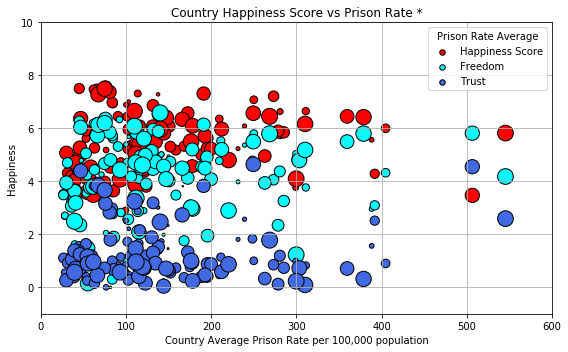

<Figure size 432x288 with 0 Axes>

In [29]:
# Incorporate the other graph properties
plt.figure(figsize=(8,5))
plt.title("Country Happiness Score vs Prison Rate *")
plt.xlabel("Country Average Prison Rate per 100,000 population")
plt.ylabel("Happiness")
plt.ylim(-1,10)
plt.xlim(0,600)

country_bubble_size = (np.arange(len(prison_count_average)))*2

plt.scatter(prison_rate_df["Prison Rate Average"],happy_df["Happiness.Score"] , marker="o", facecolors="red",
            label="Happiness Score",edgecolors="black", s=country_bubble_size, alpha=.9999)
plt.scatter(prison_rate_df["Prison Rate Average"], (happy_df["Freedom"]*10), marker="o", facecolors="cyan",
            label="Freedom",edgecolors="black", s=country_bubble_size, alpha=.9999)
plt.scatter(prison_rate_df["Prison Rate Average"], (happy_df["Trust..Government.Corruption"])*10, marker="o", facecolors="royalblue",
            label="Trust",edgecolors="black", s=country_bubble_size, alpha=.9999)

# Create a legend
lgnd=plt.legend(title="Prison Rate Average", loc="best")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.grid(which='major')

# Show plot
plt.tight_layout()
plt.show()

plt.savefig("../data/incarcerated_scatter_plot.png")

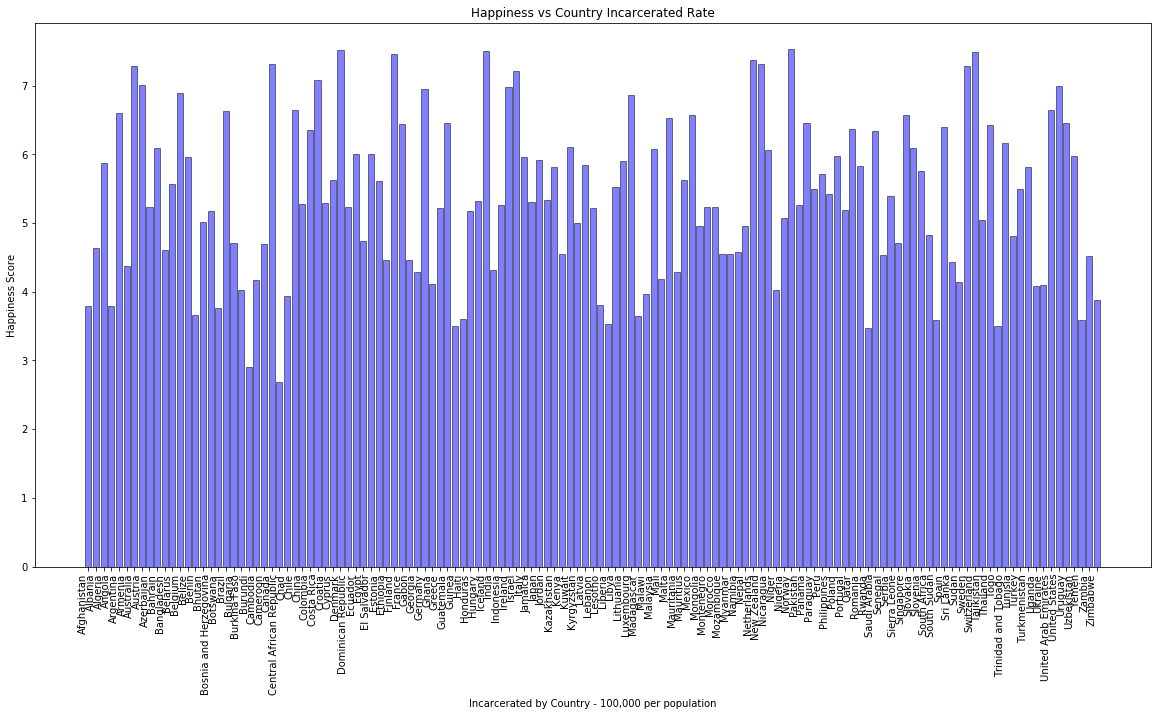

In [28]:
# Set x axis and tick locations
# Create an array that contains the number of prisoner for each country
x_axis = np.arange(len(prison_rate_df))
tick_locations = [value for value in x_axis]
country_list = happy_df["Country"]
country_happiness = happy_df['Happiness.Score']

plt.figure(figsize=(20,10))
incarcerated_bar = plt.bar(x_axis,country_happiness , color='blue', edgecolor='black', alpha=0.5, align="center")
plt.xticks(tick_locations, country_list,  ha='right', rotation="vertical")
plt.title("Happiness vs Country Incarcerated Rate")
plt.xlabel("Incarcerated by Country - 100,000 per population")
plt.ylabel("Happiness Score")
plt.savefig("../data/incarcerated_bar_plot.png")

In [13]:
new_df = pd.merge(happy_data,prison_rate_df)
new_df.to_csv("../data/incarceration_data_clean.csv",index=False)
new_df.head()

,Country,Happiness.Score,Freedom,Trust..Government.Corruption,2007 Prison Rate,2008 Prison Rate,2009 Prison Rate,2010 Prison Rate,2011 Prison Rate,2012 Prison Rate,2013 Prison Rate,2014 Prison Rate,2015 Prison Rate,2016 Prison Rate,Prison Rate Average
0,Afghanistan,3.794,0.106180,0.061158,39.8,45.8,NaN,63.5,NaN,80.2,NaN,81.0,NaN,NaN,62.1
1,Albania,4.644,0.381499,0.039864,92.3,164.3,157.5,158.4,159.2,158.1,171.2,194.8,204.6,206.0,166.6
2,Algeria,5.872,0.233336,0.146096,160.7,159.5,NaN,135.7,135.8,133.4,157.1,156.0,155.9,NaN,149.3
3,Angola,3.795,0.000000,0.069720,NaN,NaN,71.8,NaN,82.2,NaN,83.2,84.8,86.7,NaN,81.7
4,Argentina,6.599,0.494519,0.059740,131.2,135.1,140.7,143.7,145.9,147.9,151.1,160.7,167.4,174.0,149.8
